# **Imports do Projeto**

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
from tabulate import tabulate
import glob

# **Anos análisado**

In [3]:
anos = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# **Pré-processamento**

In [4]:
colunas_desejadas = [
    'Data', 
    'Hora UTC', 
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'
]

def processar_csv(diretorio, arquivo, diretorio_novo):
    caminho_arquivo = os.path.join(diretorio, arquivo)
    df = pd.read_csv(caminho_arquivo)

    df.columns = df.columns.str.strip()

    colunas_presentes = [coluna for coluna in colunas_desejadas if coluna in df.columns]
    df_filtrado = df[colunas_presentes]

    novo_caminho = os.path.join(diretorio_novo, arquivo)
    df_filtrado.to_csv(novo_caminho, index=False)

    print(f'Arquivo {arquivo} processado. Novo arquivo salvo como {novo_caminho}.')

for ano in anos:
    diretorio = ano
    diretorio_novo = f'{ano}-formatado'
    
    os.makedirs(diretorio_novo, exist_ok=True)

    arquivos_csv = [f for f in os.listdir(diretorio) if f.endswith('.csv')]

    for arquivo in arquivos_csv:
        processar_csv(diretorio, arquivo, diretorio_novo)

Arquivo 6-2016-CAMPOSDEGOYTACAZES.csv processado. Novo arquivo salvo como 2016-formatado\6-2016-CAMPOSDEGOYTACAZES.csv.
Arquivo 8-2016-RIODEJANEIRO.csv processado. Novo arquivo salvo como 2016-formatado\8-2016-RIODEJANEIRO.csv.
Arquivo 9-2016-VALENCA.csv processado. Novo arquivo salvo como 2016-formatado\9-2016-VALENCA.csv.
Arquivo 6-2017-CAMPOSDEGOYTACAZES.csv processado. Novo arquivo salvo como 2017-formatado\6-2017-CAMPOSDEGOYTACAZES.csv.
Arquivo 7-2017-ANGRADOSREIS.csv processado. Novo arquivo salvo como 2017-formatado\7-2017-ANGRADOSREIS.csv.
Arquivo 8-2017-RIODEJANEIRO.csv processado. Novo arquivo salvo como 2017-formatado\8-2017-RIODEJANEIRO.csv.
Arquivo 9-2017-VALENCA.csv processado. Novo arquivo salvo como 2017-formatado\9-2017-VALENCA.csv.
Arquivo 6-2018-CAMPOSDEGOYTACAZES.csv processado. Novo arquivo salvo como 2018-formatado\6-2018-CAMPOSDEGOYTACAZES.csv.
Arquivo 7-2018-ANGRADOSREIS.csv processado. Novo arquivo salvo como 2018-formatado\7-2018-ANGRADOSREIS.csv.
Arquivo 8-20

In [5]:
import os
import pandas as pd

anos = ['2016-formatado', '2017-formatado', '2018-formatado', '2019-formatado', '2020-formatado', '2021-formatado', '2022-formatado', '2023-formatado']

def processar_csv(arquivo_csv, ano):
    df = pd.read_csv(arquivo_csv, sep=',') 
    
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
    
    colunas_para_converter = [
        'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 
        'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 
        'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'
    ]
    
    for coluna in colunas_para_converter:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
    
    for coluna in colunas_para_converter:
        if coluna == 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':
            df.loc[df[coluna] < 0, coluna] = pd.NA
        else:
            df.loc[df[coluna] <= 0, coluna] = pd.NA 

        df[coluna] = df[coluna].interpolate(method='linear')
    
    df['Semana'] = df['Data'].dt.isocalendar().week
    
    medias_semanal = df.groupby('Semana').agg({
        'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'mean',
        'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'mean',
        'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'mean',
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'mean',
        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'mean'
    }).reset_index()
    
    nova_pasta = 'medias_semanal'
    os.makedirs(nova_pasta, exist_ok=True) 
    
    nome_arquivo_novo = os.path.join(nova_pasta, f'medias_semanal_{ano}_{os.path.basename(arquivo_csv)}')
    
    medias_semanal.to_csv(nome_arquivo_novo, index=False)
    print(f'Salvo: {nome_arquivo_novo}')

for ano in anos:
    for arquivo in os.listdir(ano):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(ano, arquivo)
            processar_csv(caminho_arquivo, ano)


Salvo: medias_semanal\medias_semanal_2016-formatado_6-2016-CAMPOSDEGOYTACAZES.csv
Salvo: medias_semanal\medias_semanal_2016-formatado_8-2016-RIODEJANEIRO.csv
Salvo: medias_semanal\medias_semanal_2016-formatado_9-2016-VALENCA.csv
Salvo: medias_semanal\medias_semanal_2017-formatado_6-2017-CAMPOSDEGOYTACAZES.csv
Salvo: medias_semanal\medias_semanal_2017-formatado_7-2017-ANGRADOSREIS.csv
Salvo: medias_semanal\medias_semanal_2017-formatado_8-2017-RIODEJANEIRO.csv
Salvo: medias_semanal\medias_semanal_2017-formatado_9-2017-VALENCA.csv
Salvo: medias_semanal\medias_semanal_2018-formatado_6-2018-CAMPOSDEGOYTACAZES.csv
Salvo: medias_semanal\medias_semanal_2018-formatado_7-2018-ANGRADOSREIS.csv
Salvo: medias_semanal\medias_semanal_2018-formatado_8-2018-RIODEJANEIRO.csv
Salvo: medias_semanal\medias_semanal_2018-formatado_9-2018-VALENCA.csv
Salvo: medias_semanal\medias_semanal_2019-formatado_6-2019-CAMPOSDEGOYTACAZES.csv
Salvo: medias_semanal\medias_semanal_2019-formatado_6-2019-CAMPOSDOSGOYTACAZES.

**Porcesso para adcionar 0 casos as semanas faltantes**

In [6]:
pasta_arquivos = 'casos_dengue_rj'

semanas_padrao = list(range(1, 53))

for arquivo in os.listdir(pasta_arquivos):
    if arquivo.endswith('.csv'):
        caminho_arquivo = os.path.join(pasta_arquivos, arquivo)
        
        df = pd.read_csv(caminho_arquivo)

        if 'Semana epidemiológica dos sintomas' in df.columns and 'Casos notificados' in df.columns:
            df = df[df['Semana epidemiológica dos sintomas'] != 'Total']
            
            df['Semana epidemiológica dos sintomas'] = pd.to_numeric(df['Semana epidemiológica dos sintomas'], errors='coerce')
            df_completo = pd.DataFrame({'Semana epidemiológica dos sintomas': semanas_padrao})
            df = df_completo.merge(df, on='Semana epidemiológica dos sintomas', how='left').fillna(0)

            df['Casos notificados'] = df['Casos notificados'].astype(int)

            df.to_csv(caminho_arquivo, index=False)

print("Processamento concluído! Semanas faltantes preenchidas com 0 nos arquivos originais.")


Processamento concluído! Semanas faltantes preenchidas com 0 nos arquivos originais.


In [7]:
import pandas as pd
import os
import glob

anos = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

cidades = {
    'VALENCA': {'sigla': 'VA', 'numero': 9},
    'RIODEJANEIRO': {'sigla': 'RJ', 'numero': 8},
    'CAMPOSDEGOYTACAZES': {'sigla': 'CG', 'numero': 6}, 
}

for ano in anos:
    for cidade, info in cidades.items():
        sigla = info['sigla']
        numero = info['numero']
        
        caminho_dengue = f'casos_dengue_rj/dengue{ano}_{sigla}.csv'
        caminho_midia_pattern = f'medias_semanal/medias_semanal_{ano}-formatado_{numero}-{ano}-{cidade}.csv'

        try:
            tabela_dengue = pd.read_csv(caminho_dengue)
        except FileNotFoundError:
            print(f"Arquivo de dengue para {ano} não encontrado: {caminho_dengue}")
            continue

        arquivos_midia = glob.glob(caminho_midia_pattern)

        if not arquivos_midia:
            print(f"Nenhum arquivo de mídias encontrado para {ano} em {caminho_midia_pattern}")
            continue

        for arquivo_midia in arquivos_midia:
            try:
                tabela_midia = pd.read_csv(arquivo_midia)

                print("Colunas do arquivo de médias:", tabela_midia.columns)

                tabela_resultado = pd.merge(
                    tabela_dengue,
                    tabela_midia[['Semana', 
                                   'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 
                                   'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 
                                   'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 
                                   'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
                                   'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']],
                    left_on='Semana epidemiológica dos sintomas', 
                    right_on='Semana', 
                    how='left'
                )

                nome_saida = f'dengue{ano}_{sigla}.csv'
                caminho_saida = os.path.join('casos_dengue_rj_resultados', nome_saida)

                tabela_resultado.to_csv(caminho_saida, index=False)

                print(f"Mesclagem concluída e arquivo salvo em: {caminho_saida}")

            except Exception as e:
                print(f"Erro ao processar o arquivo {arquivo_midia}: {e}")


Colunas do arquivo de médias: Index(['Semana', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'],
      dtype='object')
Mesclagem concluída e arquivo salvo em: casos_dengue_rj_resultados\dengue2016_VA.csv
Colunas do arquivo de médias: Index(['Semana', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'],
      dtype='object')
Mesclagem concluída e arquivo salvo em: casos_dengue_rj_resultados\dengue2016_RJ.csv
Colunas do arquivo de médias: Index(['Semana', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'UMIDA

In [8]:

source_path = 'casos_dengue_rj_resultados/'
destination_folder = 'casos_dengue_rj_unificado/'
os.makedirs(destination_folder, exist_ok=True)

all_data = []

for file_name in os.listdir(source_path):
    if file_name.endswith(".csv"):
        try:
            year = file_name[6:10] 
            region = file_name.split('_')[1].split('.')[0]
        except IndexError:
            print(f"Nome de arquivo inesperado: {file_name}")
            continue

        file_path = os.path.join(source_path, file_name)
        df = pd.read_csv(file_path)
        df['Ano'] = year
        df['Regiao'] = region

        all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

output_file = os.path.join(destination_folder, 'dados_dengue_unificado.csv')
combined_df.to_csv(output_file, index=False)
print(f"Arquivo unificado criado com sucesso em: {output_file}")

for region, group in combined_df.groupby('Regiao'):
    region_file = os.path.join(destination_folder, f'dados_dengue_{region}.csv')
    group.to_csv(region_file, index=False)
    print(f"Arquivo criado para a região '{region}' em: {region_file}")


Arquivo unificado criado com sucesso em: casos_dengue_rj_unificado/dados_dengue_unificado.csv
Arquivo criado para a região 'CG' em: casos_dengue_rj_unificado/dados_dengue_CG.csv
Arquivo criado para a região 'RJ' em: casos_dengue_rj_unificado/dados_dengue_RJ.csv
Arquivo criado para a região 'VA' em: casos_dengue_rj_unificado/dados_dengue_VA.csv


In [9]:
folder_path = 'casos_dengue_rj_unificado/'


csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

columns_to_normalize = [
    'Casos notificados',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'
]

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    df = pd.read_csv(file_path)
    
    df.dropna(inplace=True)
    
    for column in columns_to_normalize:
        if column in df.columns and not df[column].isnull().all():
            scaler = MinMaxScaler()
            df[column] = scaler.fit_transform(df[[column]])
    
    normalized_file_path = os.path.join(folder_path, f'normalizado_min_max_{csv_file}')
    df.to_csv(normalized_file_path, index=False)

    print(f"Normalizado: {csv_file}")

print("Normalização Min-Max concluída para todos os arquivos.")


Normalizado: dados_dengue_AR.csv
Normalizado: dados_dengue_CG.csv
Normalizado: dados_dengue_RJ.csv
Normalizado: dados_dengue_unificado.csv
Normalizado: dados_dengue_VA.csv
Normalizado: normalizado_min_max_dados_dengue_AR.csv
Normalizado: normalizado_min_max_dados_dengue_CG.csv
Normalizado: normalizado_min_max_dados_dengue_RJ.csv
Normalizado: normalizado_min_max_dados_dengue_unificado.csv
Normalizado: normalizado_min_max_dados_dengue_VA.csv
Normalizado: normalizado_min_max_normalizado_min_max_dados_dengue_AR.csv
Normalizado: normalizado_min_max_normalizado_min_max_dados_dengue_CG.csv
Normalizado: normalizado_min_max_normalizado_min_max_dados_dengue_RJ.csv
Normalizado: normalizado_min_max_normalizado_min_max_dados_dengue_unificado.csv
Normalizado: normalizado_min_max_normalizado_min_max_dados_dengue_VA.csv
Normalizado: normalizado_min_max_normalizado_min_max_normalizado_min_max_dados_dengue_AR.csv
Normalizado: normalizado_min_max_normalizado_min_max_normalizado_min_max_dados_dengue_CG.cs

# **Visualização do Casos de dengue nas Regiões análisadas**

,count,mean,std,min,25%,50%,75%,max
Semana epidemiológica dos sintomas,416.000000,2650,1503,100,1375,2650,3925,5200
Casos notificados,416.000000,3794,6714,000,100,900,3725,47600
Ano,416.000000,201950,229,201600,201775,201950,202125,202300


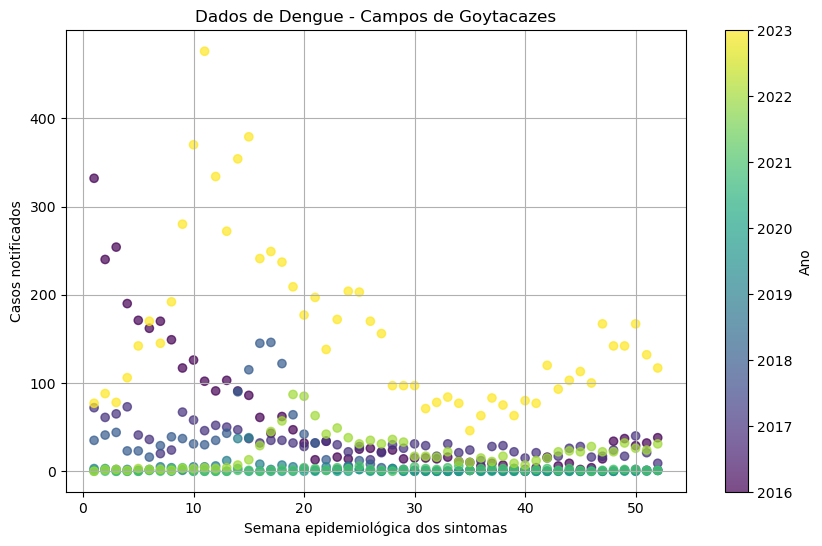

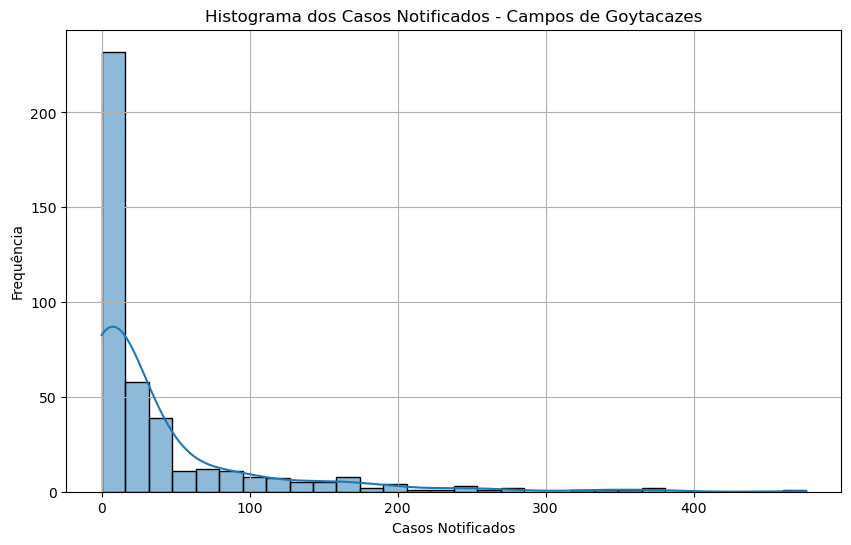

,count,mean,std,min,25%,50%,75%,max
Semana epidemiológica dos sintomas,416.000000,2650,1503,100,1375,2650,3925,5200
Casos notificados,416.000000,28676,47413,500,3800,9350,26525,309400
Ano,416.000000,201950,229,201600,201775,201950,202125,202300


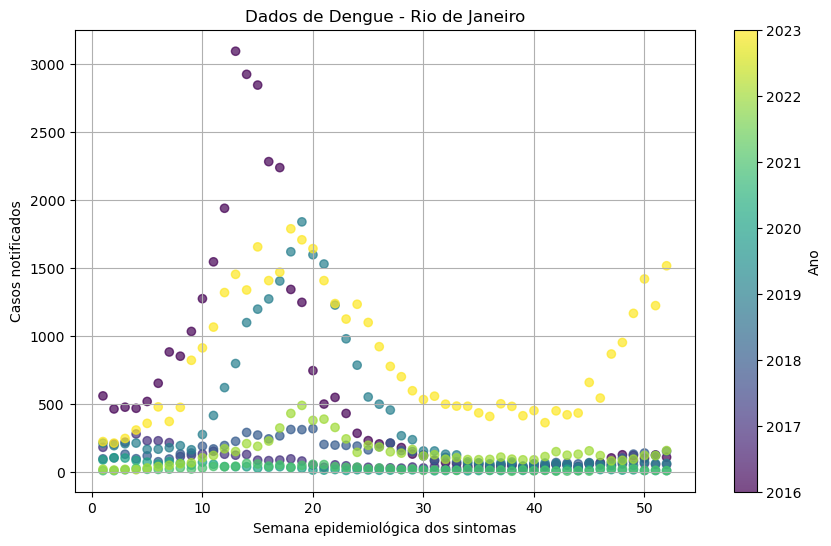

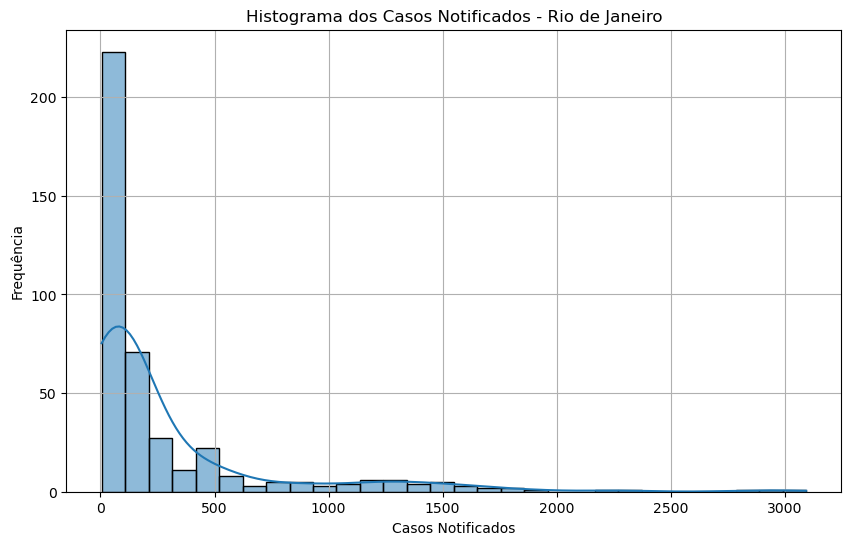

,count,mean,std,min,25%,50%,75%,max
Semana epidemiológica dos sintomas,416.000000,2650,1503,100,1375,2650,3925,5200
Casos notificados,416.000000,583,1997,000,000,100,300,19100
Ano,416.000000,201950,229,201600,201775,201950,202125,202300


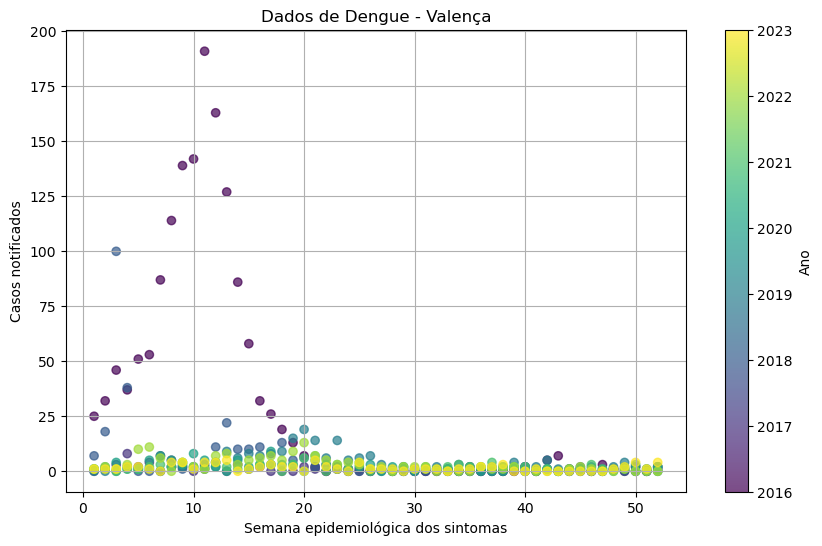

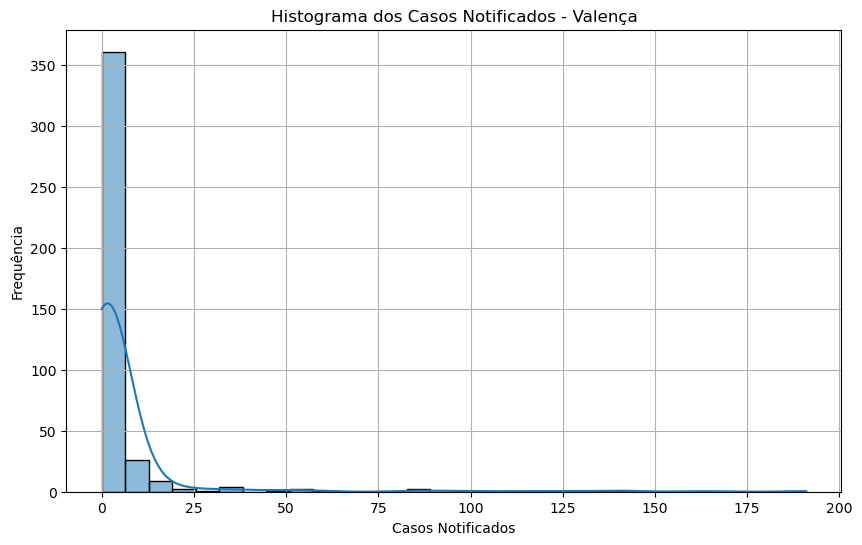

In [10]:
arquivos_regioes = {
    'CG': 'casos_dengue_rj_unificado/dados_dengue_CG.csv', 
    'RJ': 'casos_dengue_rj_unificado/dados_dengue_RJ.csv', 
    'VA': 'casos_dengue_rj_unificado/dados_dengue_VA.csv', 
}

nomes_regioes = {
    'CG': 'Campos de Goytacazes',
    'RJ': 'Rio de Janeiro',
    'VA': 'Valença'
}

for regiao, arquivo in arquivos_regioes.items():
    df = pd.read_csv(arquivo)

    nome_regiao = nomes_regioes[regiao]
    if 'Ano' not in df.columns:
        df['Ano'] = pd.to_datetime(df['Data']).dt.year

    dados_consolidados = df[['Semana epidemiológica dos sintomas', 'Casos notificados', 'Ano']]

    estatisticas = dados_consolidados.describe().T

    # Formatação numérica
    for column in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
        estatisticas[column] = estatisticas[column].apply(lambda x: f"{x:,.2f}".replace(',', '').replace('.', '').replace(' ', '').replace('\'', '').replace('"', ''))  # Remove pontos e vírgulas

    display(estatisticas[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].style
            .set_caption(f'<strong style="font-size: 16px; text-align: center;">Estatísticas Descritivas para {nome_regiao}</strong>')
            .set_table_attributes('style="width: 100%; border-collapse: collapse;"')
            .set_properties(**{'border': '1px solid black', 'text-align': 'center'}))

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        dados_consolidados['Semana epidemiológica dos sintomas'], 
        dados_consolidados['Casos notificados'], 
        c=dados_consolidados['Ano'], 
        cmap='viridis',
        alpha=0.7
    )

    plt.colorbar(scatter, label='Ano')
    plt.title(f'Dados de Dengue - {nome_regiao}')
    plt.xlabel('Semana epidemiológica dos sintomas')
    plt.ylabel('Casos notificados')
    plt.grid()

    plt.figure(figsize=(10, 6))
    sns.histplot(dados_consolidados['Casos notificados'], bins=30, kde=True)
    plt.title(f'Histograma dos Casos Notificados - {nome_regiao}')
    plt.xlabel('Casos Notificados')
    plt.ylabel('Frequência')
    plt.grid()
    
    plt.show()


# **Análise Preditiva**


Resultados da regressão logística multivariada para a região Campos de Goytacazes:

╒════════════════════╤═════════════════════════╤═══════════════╤═══════════╤═══════════════════╕
│                    │   Coeficiente Formatado │   Erro Padrão │   Valor p │ Significância     │
╞════════════════════╪═════════════════════════╪═══════════════╪═══════════╪═══════════════════╡
│ PRECIPITAÇÃO       │                 -0.1328 │        1.3531 │    0.9218 │ Não Significativo │
├────────────────────┼─────────────────────────┼───────────────┼───────────┼───────────────────┤
│ TEMPERATURA MÁXIMA │                  0.5085 │        1.4026 │    0.717  │ Não Significativo │
├────────────────────┼─────────────────────────┼───────────────┼───────────┼───────────────────┤
│ TEMPERATURA MÍNIMA │                 -0.1651 │        1.318  │    0.9003 │ Não Significativo │
├────────────────────┼─────────────────────────┼───────────────┼───────────┼───────────────────┤
│ UMIDADE REL. MAX.  │                 12.

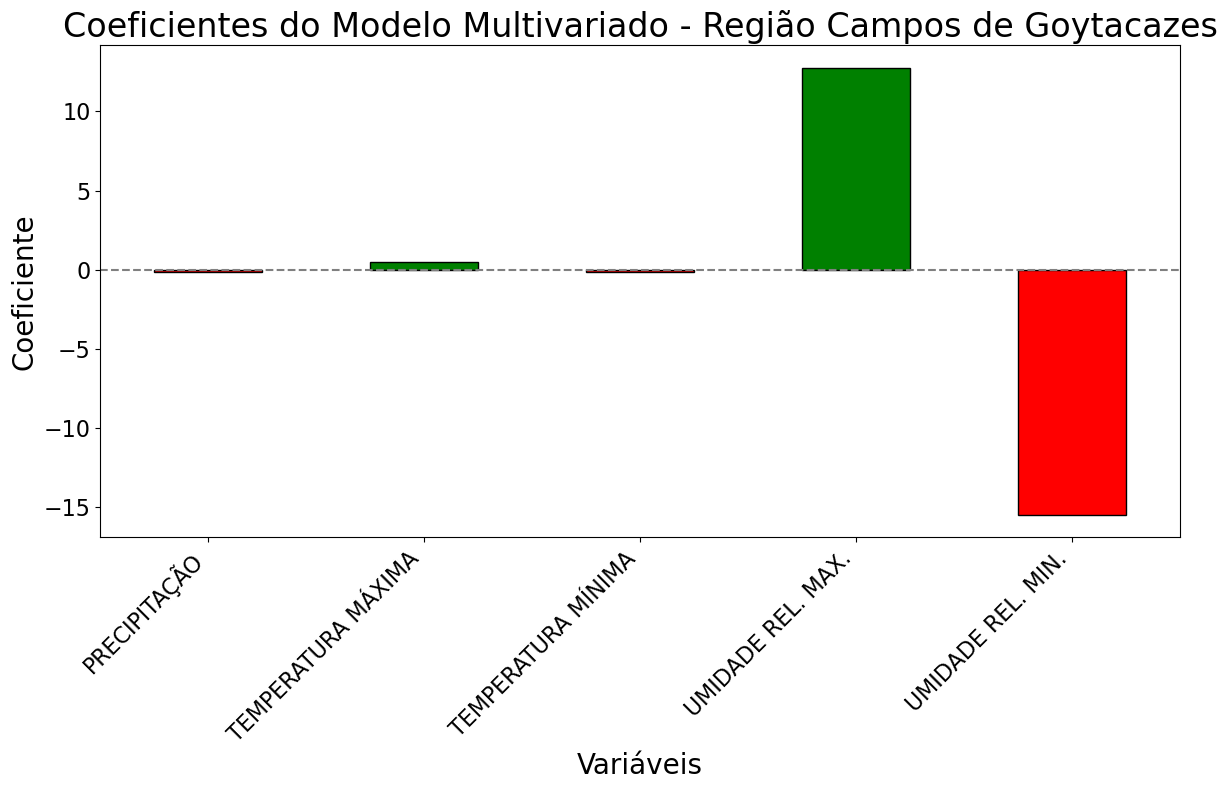

Ajuste do modelo (-2 log verossimilhança): 406.14
Número de observações: 416
Pseudo R²: 0.0296

Explicação dos resultados:
Na região Campos de Goytacazes:
- O modelo apresenta um Pseudo R-squ. de 0.03, indicando que aproximadamente 2.96% da variação nos casos de dengue é explicada pelas variáveis climáticas.
- O Log-Likelihood é -203.07, indicando o ajuste do modelo.
- O coeficiente para 'PRECIPITAÇÃO' é -0.1328. Isso significa que um aumento em PRECIPITAÇÃO está associado a uma diminuição nos casos de dengue.
- O coeficiente para 'TEMPERATURA MÁXIMA' é 0.5085. Isso significa que um aumento em TEMPERATURA MÁXIMA está associado a um aumento nos casos de dengue.
- O coeficiente para 'TEMPERATURA MÍNIMA' é -0.1651. Isso significa que um aumento em TEMPERATURA MÍNIMA está associado a uma diminuição nos casos de dengue.
- O coeficiente para 'UMIDADE REL. MAX.' é 12.7658. Isso significa que um aumento em UMIDADE REL. MAX. está associado a um aumento nos casos de dengue.
- O coeficiente para 

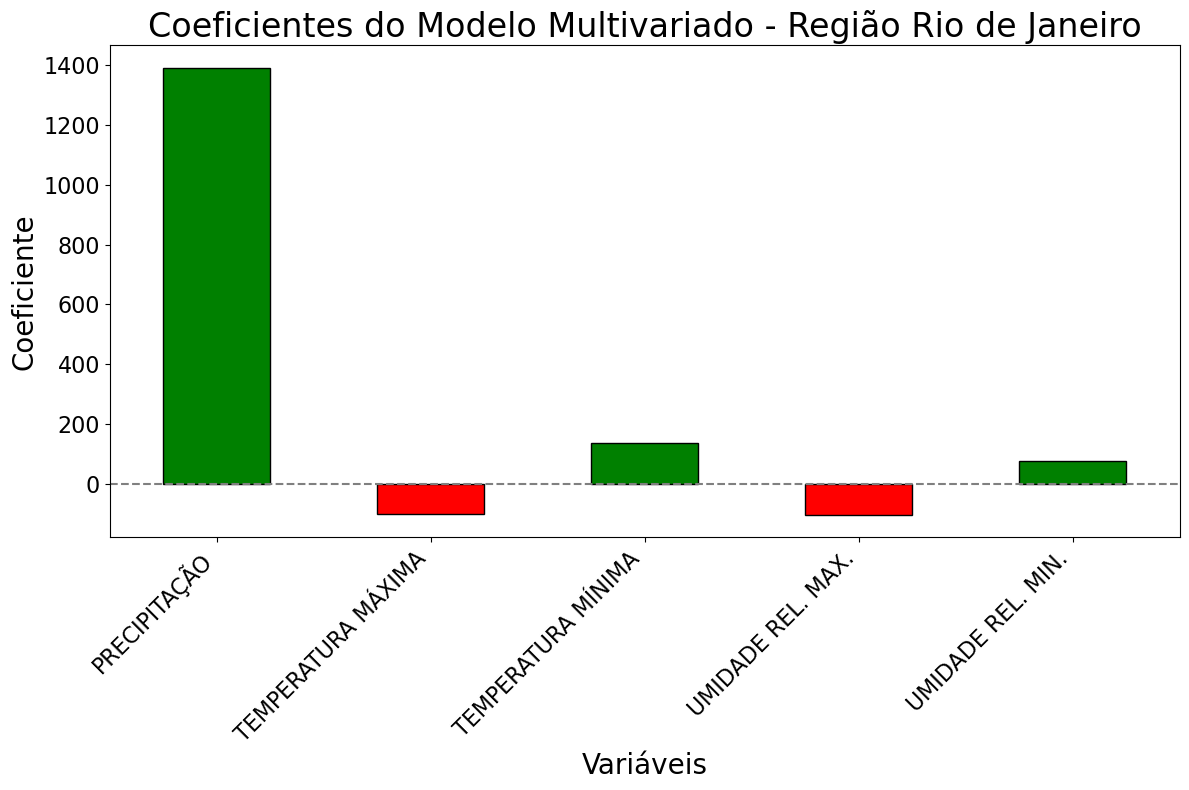

Ajuste do modelo (-2 log verossimilhança): 5.19
Número de observações: 416
Pseudo R²: 0.6307

Explicação dos resultados:
Na região Rio de Janeiro:
- O modelo apresenta um Pseudo R-squ. de 0.63, indicando que aproximadamente 63.07% da variação nos casos de dengue é explicada pelas variáveis climáticas.
- O Log-Likelihood é -2.60, indicando o ajuste do modelo.
- O coeficiente para 'PRECIPITAÇÃO' é 1390.6796. Isso significa que um aumento em PRECIPITAÇÃO está associado a um aumento nos casos de dengue.
- O coeficiente para 'TEMPERATURA MÁXIMA' é -101.2309. Isso significa que um aumento em TEMPERATURA MÁXIMA está associado a uma diminuição nos casos de dengue.
- O coeficiente para 'TEMPERATURA MÍNIMA' é 137.5229. Isso significa que um aumento em TEMPERATURA MÍNIMA está associado a um aumento nos casos de dengue.
- O coeficiente para 'UMIDADE REL. MAX.' é -102.6576. Isso significa que um aumento em UMIDADE REL. MAX. está associado a uma diminuição nos casos de dengue.
- O coeficiente para '

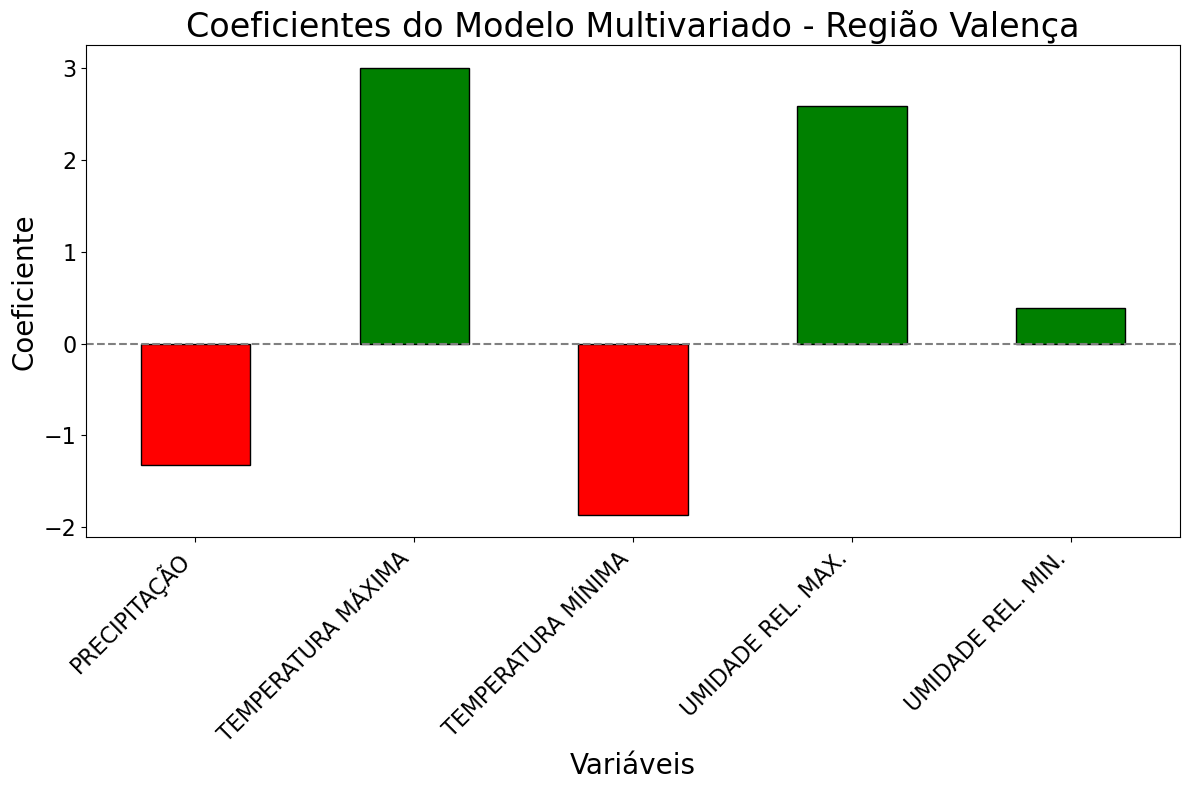

Ajuste do modelo (-2 log verossimilhança): 497.92
Número de observações: 416
Pseudo R²: 0.0422

Explicação dos resultados:
Na região Valença:
- O modelo apresenta um Pseudo R-squ. de 0.04, indicando que aproximadamente 4.22% da variação nos casos de dengue é explicada pelas variáveis climáticas.
- O Log-Likelihood é -248.96, indicando o ajuste do modelo.
- O coeficiente para 'PRECIPITAÇÃO' é -1.3192. Isso significa que um aumento em PRECIPITAÇÃO está associado a uma diminuição nos casos de dengue.
- O coeficiente para 'TEMPERATURA MÁXIMA' é 3.0068. Isso significa que um aumento em TEMPERATURA MÁXIMA está associado a um aumento nos casos de dengue.
- O coeficiente para 'TEMPERATURA MÍNIMA' é -1.8666. Isso significa que um aumento em TEMPERATURA MÍNIMA está associado a uma diminuição nos casos de dengue.
- O coeficiente para 'UMIDADE REL. MAX.' é 2.5922. Isso significa que um aumento em UMIDADE REL. MAX. está associado a um aumento nos casos de dengue.
- O coeficiente para 'UMIDADE REL. 

In [22]:
import pandas as pd
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
from tabulate import tabulate

nomes_regioes = {
    'CG': 'Campos de Goytacazes',
    'RJ': 'Rio de Janeiro',
    'VA': 'Valença'
}

arquivos_regioes = {
    'CG': 'casos_dengue_rj_unificado/normalizado_min_max_dados_dengue_CG.csv', 
    'RJ': 'casos_dengue_rj_unificado/normalizado_min_max_dados_dengue_RJ.csv', 
    'VA': 'casos_dengue_rj_unificado/normalizado_min_max_dados_dengue_VA.csv', 
}

nomes_variaveis = {
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'PRECIPITAÇÃO', 
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'TEMPERATURA MÁXIMA', 
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'TEMPERATURA MÍNIMA', 
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'UMIDADE REL. MAX.', 
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'UMIDADE REL. MIN.'
}

for regiao, arquivo in arquivos_regioes.items():
    dados = pd.read_csv(arquivo)

    dados = dados.dropna(subset=[
        'Casos notificados', 
        'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 
        'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 
        'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 
        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'
    ])
    
    dados['Casos_bin'] = dados['Casos notificados'].apply(lambda x: 1 if x > 0 else 0)

    Y = dados['Casos_bin']
    variaveis_independentes = list(nomes_variaveis.keys())
    X = dados[variaveis_independentes]
    X = sm.add_constant(X) 

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)  
        warnings.simplefilter("ignore", category=sm.tools.sm_exceptions.ConvergenceWarning)  

        try:
            modelo = sm.Logit(Y, X)
            resultado = modelo.fit(disp=0)

            nome_regiao = nomes_regioes[regiao]
            print(f'\nResultados da regressão logística multivariada para a região {nome_regiao}:\n')

            # Criar DataFrame de resultados e renomear variáveis
            resultados = pd.DataFrame({
                'Coeficiente': resultado.params,
                'Erro Padrão': resultado.bse,
                'Valor p': resultado.pvalues
            })

            resultados = resultados[resultados.index != 'const']
            resultados['Significância'] = resultados['Valor p'].apply(lambda x: 'Significativo' if x < 0.05 else 'Não Significativo')
            resultados = resultados.round(4) 
            resultados = resultados.rename(index=nomes_variaveis)  # Renomeando as variáveis para nomes amigáveis

            resultados['Coeficiente Formatado'] = resultados['Coeficiente'].apply(
                lambda x: f'\033[92m{x:.4f}\033[0m' if x > 0 else f'\033[91m{x:.4f}\033[0m'
            )

            print(tabulate(resultados[['Coeficiente Formatado', 'Erro Padrão', 'Valor p', 'Significância']], headers='keys', tablefmt='fancy_grid'))

            coeficientes = resultados['Coeficiente']
            plt.figure(figsize=(12, 8)) 
            coeficientes.plot(kind='bar', color=(coeficientes.apply(lambda x: 'green' if x > 0 else 'red')), edgecolor='black')
            plt.title(f'Coeficientes do Modelo Multivariado - Região {nome_regiao}', fontsize=24)
            plt.ylabel('Coeficiente', fontsize=20)
            plt.xlabel('Variáveis', fontsize=20)
            plt.axhline(0, color='grey', linestyle='--')
            plt.xticks(rotation=45, fontsize=16, ha="right")
            plt.yticks(fontsize=16)
            plt.tight_layout()
            plt.show()

            ajuste_modelo = -2 * resultado.llf
            print(f'Ajuste do modelo (-2 log verossimilhança): {ajuste_modelo:.2f}')
            print(f"Número de observações: {resultado.nobs}")
            print(f"Pseudo R²: {resultado.prsquared:.4f}")

            print("\nExplicação dos resultados:")
            print(f"Na região {nome_regiao}:")
            print(f"- O modelo apresenta um Pseudo R-squ. de {resultado.prsquared:.2f}, indicando que aproximadamente {resultado.prsquared * 100:.2f}% da variação nos casos de dengue é explicada pelas variáveis climáticas.")
            print(f"- O Log-Likelihood é {resultado.llf:.2f}, indicando o ajuste do modelo.")
            
            for var in variaveis_independentes:
                nome_variavel = nomes_variaveis[var]
                coef = resultado.params[var]
                print(f"- O coeficiente para '{nome_variavel}' é {coef:.4f}. Isso significa que um aumento em {nome_variavel} está associado a {'um aumento' if coef > 0 else 'uma diminuição'} nos casos de dengue.")

        except Exception as e:
            print(f"Erro ao ajustar o modelo para a região {nome_regiao}: {e}")

    print("\n" + "-"*50 + "\n")
